In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment setups

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [3]:
def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

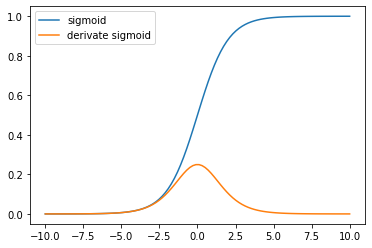

In [4]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, derivative_sigmoid(sigmoid(x)), label='derivate sigmoid')
plt.legend()

In [5]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
            
    return np.array(inputs), np.array(labels).reshape(n, 1)

In [6]:
def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
            
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [7]:
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.subplot(1, 2, 2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    
    plt.show()
    print(f'Accuracy : {float(np.sum(y == pred_y)) * 100 / len(y)} %')

In [8]:
eps = 1e-6

def cross_entropy(y, y_hat):
    return (-1/y.shape[0]) * np.sum(y*np.log(y_hat+eps) + (1-y)*np.log(1-y_hat+eps))

def derivative_ce(y, y_hat):
    return (1/y.shape[0]) * ((-y_hat/(y+eps)) + ((1-y_hat)/(1-y+eps)))

In [9]:
class myLayer():
    def __init__(self, input_size, output_size, activation):
        self.w = np.random.normal(0, 1, (input_size, output_size))
        self.activation = activation
        
    def forward(self, x):
        self.forward_pass = x
        self.y = np.matmul(x, self.w)
        if self.activation == 'Sigmoid':
            self.y = sigmoid(self.y)
        
        return self.y
    
    def backward(self, derivative_C):
        if self.activation == 'Sigmoid':
            self.backward_pass = np.multiply(
            derivative_sigmoid(self.y),
            derivative_C
        )
        elif self.activation == 'None':
            self.backward_pass = derivative_C
        
        return np.matmul(self.backward_pass, self.w.T) 
    
    def update(self, learning_rate):
        self.gradient = np.matmul(
            self.forward_pass.T,
            self.backward_pass
        )
        self.w -= learning_rate * self.gradient
        return self.gradient

In [10]:
class myNet():
    def __init__(self, sizes, learning_rate, activation):
        self.learning_rate = learning_rate
        sizes_out = sizes[1:] + [0]
        self.layer = []
        for a, b in zip(sizes, sizes_out):
            if b == 0:
                continue
            elif b == 1:
                self.layer += [myLayer(a, b, 'Sigmoid')]
            else:
                self.layer += [myLayer(a, b, activation)]
            
    def forward(self, x):
        for l in self.layer:
            x = l.forward(x)
        return x
    
    def backward(self, dC):
        for l in self.layer[::-1]:
            dC = l.backward(dC)
        return dC
            
    def update(self):
        gradients = []
        for l in self.layer:
            gradients += [l.update(self.learning_rate)]
        return gradients

In [11]:
epochs = 100000
loss_threshold = 0.005

def train_linear(learning_rate, hidden_units, activation):
    nn_linear = myNet([2, hidden_units, hidden_units, 1], learning_rate, activation)
    x_linear, y_linear = generate_linear()
    
    loss = []
    for i in range(epochs):
        y = nn_linear.forward(x_linear)
        loss_linear = cross_entropy(y, y_linear)
        nn_linear.backward(derivative_ce(y, y_linear))
        nn_linear.update()
        loss.append(loss_linear)

        if i % 500 == 0:
            print('epoch {:4d} loss : {:.4f}'.format(i, loss_linear))
        
        #early stop
        if loss_linear < loss_threshold:
            break
            
    plt.plot(loss, '-')
    plt.title('Learning curve')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    y1 = nn_linear.forward(x_linear)
    show_result(x_linear, y_linear, np.round(y1))
    print('\n Predictions : \n', y1)

In [12]:
def train_XOR(learning_rate, hidden_units, activation):
    nn_XOR = myNet([2, hidden_units, hidden_units, 1], learning_rate, activation)
    x_XOR, y_XOR = generate_XOR_easy()
    
    loss = []
    for i in range(epochs):
        y = nn_XOR.forward(x_XOR)
        loss_XOR = cross_entropy(y, y_XOR)
        nn_XOR.backward(derivative_ce(y, y_XOR))
        nn_XOR.update()
        loss.append(loss_XOR)
        
        if i % 500 == 0:
            print('epoch {:4d} loss : {:.4f}'.format(i, loss_XOR))
        
        #early stop
        if loss_XOR < loss_threshold:
            break
            
    plt.plot(loss, '-')
    plt.title('Learning curve')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    y2 = nn_XOR.forward(x_XOR)
    show_result(x_XOR, y_XOR, np.round(y2))
    print('\n Predictions : \n', y2)

# Results

------- Linear : Learning rate = 1, Hidden units = 4, Activation function = Sigmoid ------

epoch    0 loss : 6.9127
epoch  500 loss : 0.4336
epoch 1000 loss : 0.2243
epoch 1500 loss : 0.1540
epoch 2000 loss : 0.1164
epoch 2500 loss : 0.0925
epoch 3000 loss : 0.0758
epoch 3500 loss : 0.0637
epoch 4000 loss : 0.0544
epoch 4500 loss : 0.0471
epoch 5000 loss : 0.0413
epoch 5500 loss : 0.0365
epoch 6000 loss : 0.0326
epoch 6500 loss : 0.0293
epoch 7000 loss : 0.0265
epoch 7500 loss : 0.0241
epoch 8000 loss : 0.0221
epoch 8500 loss : 0.0203
epoch 9000 loss : 0.0188
epoch 9500 loss : 0.0174
epoch 10000 loss : 0.0162
epoch 10500 loss : 0.0151
epoch 11000 loss : 0.0141
epoch 11500 loss : 0.0133
epoch 12000 loss : 0.0125
epoch 12500 loss : 0.0118
epoch 13000 loss : 0.0112
epoch 13500 loss : 0.0106
epoch 14000 loss : 0.0100
epoch 14500 loss : 0.0096
epoch 15000 loss : 0.0091
epoch 15500 loss : 0.0087
epoch 16000 loss : 0.0083
epoch 16500 loss : 0.0079
epoch 17000 loss : 0.0076
epoch 17500 loss :

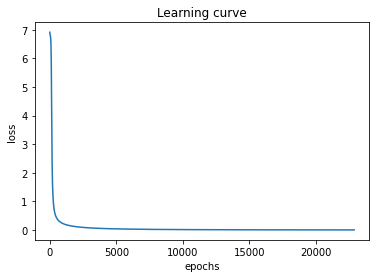

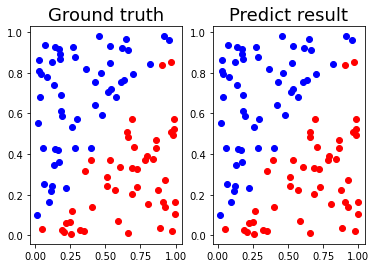

Accuracy : 100.0 %

 Predictions : 
 [[1.86777708e-07]
 [9.99999997e-01]
 [3.06898063e-07]
 [7.41551052e-03]
 [1.89471276e-07]
 [2.01254752e-07]
 [1.85249111e-07]
 [1.07369047e-06]
 [9.99999811e-01]
 [9.99999998e-01]
 [9.99999997e-01]
 [9.99999997e-01]
 [2.02174540e-07]
 [1.97023515e-07]
 [2.01932526e-07]
 [9.99999993e-01]
 [9.99999994e-01]
 [9.99999998e-01]
 [1.86184450e-07]
 [1.04257906e-03]
 [1.62155175e-06]
 [3.51045559e-07]
 [9.99999995e-01]
 [2.09466868e-07]
 [9.99999998e-01]
 [9.99999998e-01]
 [9.99999973e-01]
 [2.01024190e-07]
 [2.12398203e-07]
 [1.85679353e-07]
 [9.99999989e-01]
 [1.99030696e-07]
 [9.99858767e-01]
 [1.97373006e-07]
 [1.05759159e-02]
 [9.99999994e-01]
 [2.03324434e-07]
 [2.29707494e-07]
 [9.83501492e-01]
 [9.99999998e-01]
 [3.47308950e-07]
 [2.20567148e-07]
 [2.58587292e-07]
 [9.99999998e-01]
 [1.96587391e-07]
 [9.99999998e-01]
 [9.99999998e-01]
 [1.87392041e-07]
 [9.99999995e-01]
 [9.99999998e-01]
 [9.99999998e-01]
 [9.99999998e-01]
 [4.50761054e-07]
 [2.95887

In [13]:
print('------- Linear : Learning rate = 1, Hidden units = 4, Activation function = Sigmoid ------\n')
train_linear(1, 4, 'Sigmoid')

------- XOR : Learning rate = 1, Hidden units = 4, Activation function = Sigmoid ------

epoch    0 loss : 6.8527
epoch  500 loss : 5.6797
epoch 1000 loss : 0.5529
epoch 1500 loss : 0.1389
epoch 2000 loss : 0.0723
epoch 2500 loss : 0.0478
epoch 3000 loss : 0.0354
epoch 3500 loss : 0.0280
epoch 4000 loss : 0.0231
epoch 4500 loss : 0.0196
epoch 5000 loss : 0.0170
epoch 5500 loss : 0.0150
epoch 6000 loss : 0.0134
epoch 6500 loss : 0.0121
epoch 7000 loss : 0.0111
epoch 7500 loss : 0.0102
epoch 8000 loss : 0.0094
epoch 8500 loss : 0.0087
epoch 9000 loss : 0.0082
epoch 9500 loss : 0.0077
epoch 10000 loss : 0.0072
epoch 10500 loss : 0.0068
epoch 11000 loss : 0.0065
epoch 11500 loss : 0.0061
epoch 12000 loss : 0.0058
epoch 12500 loss : 0.0056
epoch 13000 loss : 0.0053
epoch 13500 loss : 0.0051


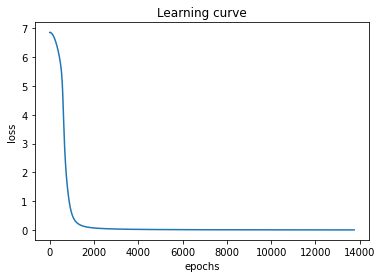

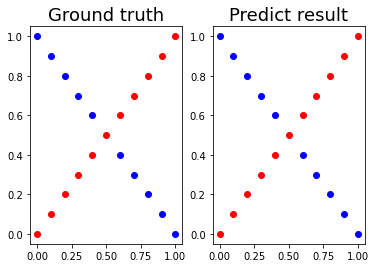

Accuracy : 100.0 %

 Predictions : 
 [[1.38458617e-04]
 [9.99860346e-01]
 [2.06104101e-04]
 [9.99859807e-01]
 [3.25017114e-04]
 [9.99856918e-01]
 [4.60183544e-04]
 [9.99836672e-01]
 [5.23027036e-04]
 [9.98525575e-01]
 [4.86420582e-04]
 [4.03809563e-04]
 [9.98503537e-01]
 [3.23940702e-04]
 [9.99851391e-01]
 [2.63139146e-04]
 [9.99879287e-01]
 [2.20810709e-04]
 [9.99883909e-01]
 [1.92356695e-04]
 [9.99885026e-01]]


In [14]:
print('------- XOR : Learning rate = 1, Hidden units = 4, Activation function = Sigmoid ------\n')
train_XOR(1, 4, 'Sigmoid')

# Discussion
## Linear

---------- Different learning rate, Hidden units = 4, Activation function = Sigmoid ---------

˙ Learning rate = 0.100
epoch    0 loss : 6.8696
epoch  500 loss : 6.0121
epoch 1000 loss : 4.0093
epoch 1500 loss : 2.4332
epoch 2000 loss : 1.6457
epoch 2500 loss : 1.2244
epoch 3000 loss : 0.9741
epoch 3500 loss : 0.8117
epoch 4000 loss : 0.6983
epoch 4500 loss : 0.6144
epoch 5000 loss : 0.5496
epoch 5500 loss : 0.4977
epoch 6000 loss : 0.4551
epoch 6500 loss : 0.4193
epoch 7000 loss : 0.3888
epoch 7500 loss : 0.3623
epoch 8000 loss : 0.3391
epoch 8500 loss : 0.3186
epoch 9000 loss : 0.3003
epoch 9500 loss : 0.2838
epoch 10000 loss : 0.2689
epoch 10500 loss : 0.2553
epoch 11000 loss : 0.2429
epoch 11500 loss : 0.2315
epoch 12000 loss : 0.2210
epoch 12500 loss : 0.2113
epoch 13000 loss : 0.2023
epoch 13500 loss : 0.1939
epoch 14000 loss : 0.1861
epoch 14500 loss : 0.1788
epoch 15000 loss : 0.1719
epoch 15500 loss : 0.1655
epoch 16000 loss : 0.1594
epoch 16500 loss : 0.1537
epoch 17000 loss 

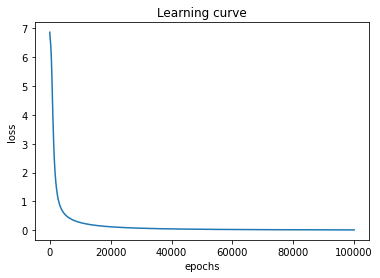

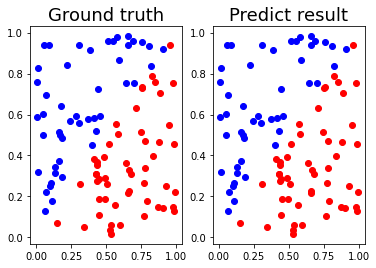

Accuracy : 100.0 %

 Predictions : 
 [[9.99999974e-01]
 [5.58204314e-06]
 [8.77402018e-06]
 [9.99410938e-01]
 [2.82799121e-06]
 [9.99999988e-01]
 [2.80928435e-06]
 [2.86789941e-06]
 [2.92423419e-06]
 [3.23783652e-06]
 [3.15330489e-06]
 [2.81653426e-06]
 [2.90422866e-06]
 [9.99999987e-01]
 [9.99999851e-01]
 [9.99471295e-01]
 [2.91336858e-06]
 [9.99999989e-01]
 [3.00783607e-06]
 [9.99999992e-01]
 [9.99999993e-01]
 [9.99999991e-01]
 [9.99999993e-01]
 [3.56484811e-06]
 [3.37562501e-06]
 [4.03359100e-06]
 [3.04989698e-06]
 [2.82514220e-06]
 [9.99999710e-01]
 [2.98106156e-06]
 [3.32314664e-02]
 [3.07208375e-06]
 [9.99999973e-01]
 [5.72598072e-06]
 [9.99999870e-01]
 [3.73123569e-04]
 [2.82020991e-06]
 [9.99999991e-01]
 [9.99999987e-01]
 [9.99999986e-01]
 [5.43083489e-03]
 [2.95800618e-06]
 [9.75824307e-01]
 [9.99999988e-01]
 [1.65972278e-05]
 [2.83526598e-06]
 [2.89688456e-06]
 [2.13373892e-05]
 [9.99999987e-01]
 [9.99999989e-01]
 [2.89180653e-06]
 [9.99999993e-01]
 [9.26287984e-06]
 [9.99999

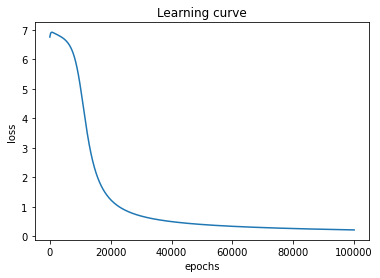

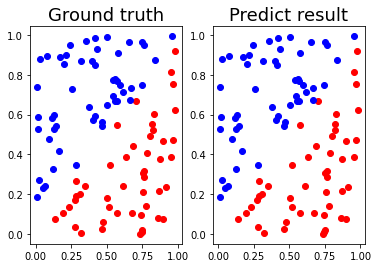

Accuracy : 100.0 %

 Predictions : 
 [[1.40367190e-04]
 [9.99943890e-01]
 [9.99941312e-01]
 [9.89505720e-01]
 [9.99931162e-01]
 [9.99947916e-01]
 [9.99918231e-01]
 [1.35281937e-04]
 [7.20586095e-01]
 [9.23721887e-04]
 [1.02844584e-04]
 [1.08118677e-04]
 [9.99884764e-01]
 [1.23050078e-04]
 [2.38347692e-01]
 [9.79438942e-01]
 [3.84537467e-04]
 [9.99673885e-01]
 [1.65225918e-04]
 [2.54308817e-04]
 [9.99938570e-01]
 [9.99930979e-01]
 [3.68804659e-04]
 [9.99917967e-01]
 [1.02785360e-04]
 [9.98876343e-01]
 [9.99721662e-01]
 [1.34080202e-04]
 [9.99935940e-01]
 [8.99516833e-02]
 [9.99945340e-01]
 [9.99537703e-01]
 [2.69526161e-03]
 [1.10729131e-04]
 [1.49500944e-04]
 [1.10060448e-04]
 [2.18273485e-01]
 [1.03284745e-04]
 [9.99948562e-01]
 [9.57497792e-01]
 [9.99003220e-01]
 [9.98668596e-01]
 [9.99896816e-01]
 [3.17581460e-03]
 [2.51339137e-04]
 [9.99656836e-01]
 [1.56642477e-04]
 [9.99944294e-01]
 [1.13507099e-04]
 [9.99071028e-01]
 [1.02977661e-04]
 [9.98058724e-01]
 [1.25933743e-04]
 [9.99573

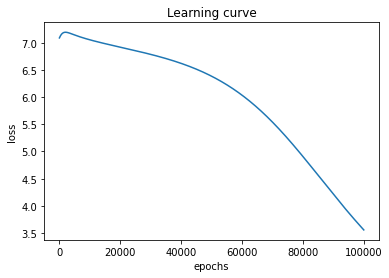

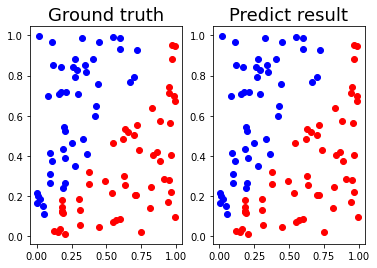

Accuracy : 100.0 %

 Predictions : 
 [[0.5314367 ]
 [0.33398599]
 [0.89063988]
 [0.35208393]
 [0.39215776]
 [0.261345  ]
 [0.61041971]
 [0.21825169]
 [0.21365561]
 [0.66782312]
 [0.19026215]
 [0.39770763]
 [0.7203897 ]
 [0.12650852]
 [0.85448849]
 [0.1160015 ]
 [0.41173109]
 [0.322149  ]
 [0.56320233]
 [0.3682342 ]
 [0.54729665]
 [0.24547121]
 [0.15549626]
 [0.18127971]
 [0.29843916]
 [0.4854737 ]
 [0.85080544]
 [0.78822253]
 [0.93016946]
 [0.66414673]
 [0.25741768]
 [0.53624856]
 [0.55279472]
 [0.15501028]
 [0.3672379 ]
 [0.37388333]
 [0.42460929]
 [0.16860286]
 [0.67832659]
 [0.90714213]
 [0.77796182]
 [0.16131505]
 [0.40990124]
 [0.85644056]
 [0.70379193]
 [0.77986111]
 [0.36023985]
 [0.75042136]
 [0.51555879]
 [0.20696692]
 [0.14195476]
 [0.21287691]
 [0.77132292]
 [0.27959824]
 [0.86676765]
 [0.36707494]
 [0.15753125]
 [0.52649276]
 [0.66450649]
 [0.15227391]
 [0.73991966]
 [0.31387733]
 [0.43154772]
 [0.70759781]
 [0.81189266]
 [0.1205956 ]
 [0.81409489]
 [0.44995929]
 [0.8705465

In [15]:
print('---------- Different learning rate, Hidden units = 4, Activation function = Sigmoid ---------')
for lr in [0.1, 0.01, 0.001]:
    print('\n˙ Learning rate = {:.3f}'.format(lr))
    train_linear(lr, 4, 'Sigmoid')

---------- Learning rate = 1, Different hidden units, Activation function = Sigmoid ---------

˙ Hidden units = 2
epoch    0 loss : 6.9684
epoch  500 loss : 3.4486
epoch 1000 loss : 0.5695
epoch 1500 loss : 0.2975
epoch 2000 loss : 0.2355
epoch 2500 loss : 0.2077
epoch 3000 loss : 0.1907
epoch 3500 loss : 0.1786
epoch 4000 loss : 0.1691
epoch 4500 loss : 0.1612
epoch 5000 loss : 0.1545
epoch 5500 loss : 0.1485
epoch 6000 loss : 0.1431
epoch 6500 loss : 0.1381
epoch 7000 loss : 0.1334
epoch 7500 loss : 0.1290
epoch 8000 loss : 0.1249
epoch 8500 loss : 0.1209
epoch 9000 loss : 0.1170
epoch 9500 loss : 0.1132
epoch 10000 loss : 0.1096
epoch 10500 loss : 0.1060
epoch 11000 loss : 0.1026
epoch 11500 loss : 0.0992
epoch 12000 loss : 0.0959
epoch 12500 loss : 0.0927
epoch 13000 loss : 0.0896
epoch 13500 loss : 0.0865
epoch 14000 loss : 0.0835
epoch 14500 loss : 0.0806
epoch 15000 loss : 0.0778
epoch 15500 loss : 0.0751
epoch 16000 loss : 0.0724
epoch 16500 loss : 0.0698
epoch 17000 loss : 0.0

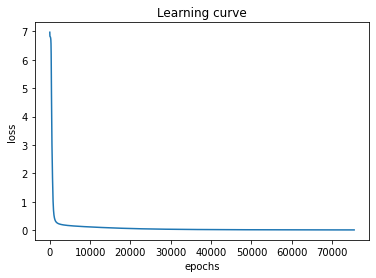

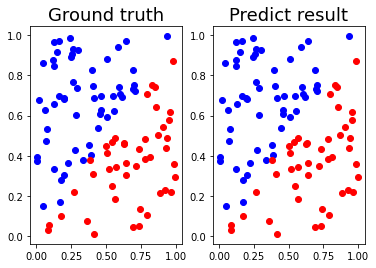

Accuracy : 100.0 %

 Predictions : 
 [[1.03321405e-11]
 [9.99999989e-01]
 [8.30646455e-12]
 [9.99999989e-01]
 [7.10991995e-11]
 [8.33462378e-12]
 [8.32217671e-12]
 [8.32886575e-12]
 [9.99999989e-01]
 [3.17239040e-11]
 [9.99985344e-01]
 [9.99999989e-01]
 [9.99999989e-01]
 [8.30656515e-12]
 [9.99999989e-01]
 [9.99999967e-01]
 [8.31120508e-12]
 [1.00609140e-11]
 [9.99999989e-01]
 [1.78736780e-11]
 [9.99999989e-01]
 [9.99999989e-01]
 [9.99999989e-01]
 [8.32375267e-12]
 [1.19574259e-11]
 [8.40480315e-12]
 [9.99999989e-01]
 [9.99999989e-01]
 [9.99999989e-01]
 [9.99999989e-01]
 [9.99999989e-01]
 [8.32571646e-12]
 [9.13621157e-12]
 [9.99999989e-01]
 [8.30708165e-12]
 [9.99999986e-01]
 [9.99999987e-01]
 [9.99999989e-01]
 [8.30704807e-12]
 [8.31378073e-12]
 [9.99999971e-01]
 [9.99999989e-01]
 [9.99999989e-01]
 [8.32656476e-12]
 [8.56079295e-12]
 [8.30658335e-12]
 [9.99999989e-01]
 [9.99999973e-01]
 [9.99999989e-01]
 [8.36147180e-12]
 [8.32469997e-12]
 [8.30584895e-12]
 [2.48706667e-09]
 [9.99999

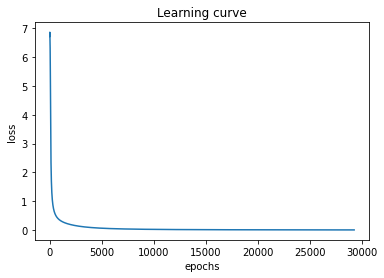

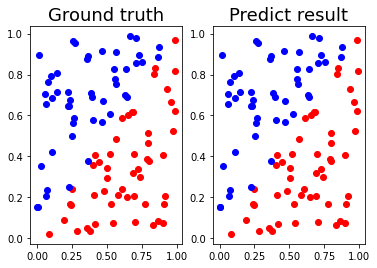

Accuracy : 100.0 %

 Predictions : 
 [[9.99999998e-01]
 [8.64266008e-05]
 [2.18156245e-11]
 [1.18194193e-11]
 [7.70520635e-12]
 [9.99999998e-01]
 [3.61331894e-03]
 [1.51156416e-11]
 [7.69122129e-12]
 [9.99999998e-01]
 [7.63739546e-12]
 [9.99999999e-01]
 [1.10315947e-11]
 [1.23640924e-02]
 [9.98101177e-01]
 [1.86169402e-09]
 [9.99999998e-01]
 [9.99999999e-01]
 [3.86521029e-11]
 [9.99999999e-01]
 [9.99999998e-01]
 [9.99999997e-01]
 [9.99999999e-01]
 [1.25723200e-11]
 [9.99999997e-01]
 [9.99999948e-01]
 [5.60086610e-08]
 [9.99999998e-01]
 [9.99999998e-01]
 [1.40807440e-10]
 [9.99999998e-01]
 [9.99999999e-01]
 [9.99999999e-01]
 [9.99999999e-01]
 [9.99999999e-01]
 [1.04259173e-11]
 [9.99999998e-01]
 [9.99999998e-01]
 [8.13976762e-12]
 [1.24712437e-11]
 [1.52620249e-11]
 [9.99999996e-01]
 [9.99999994e-01]
 [9.07102667e-12]
 [9.99999999e-01]
 [9.99999998e-01]
 [7.76321370e-12]
 [9.99999999e-01]
 [1.12883583e-11]
 [1.00001866e-11]
 [9.99999999e-01]
 [1.09358511e-11]
 [2.23314304e-11]
 [1.10343

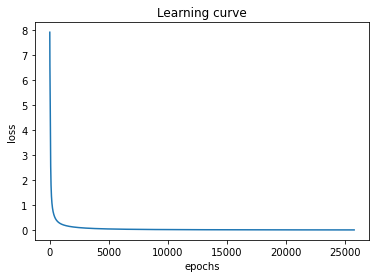

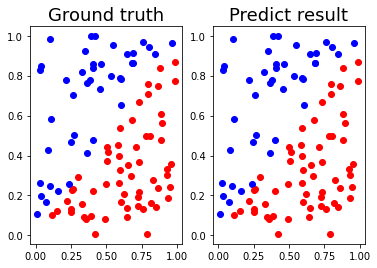

Accuracy : 100.0 %

 Predictions : 
 [[1.00000000e+00]
 [6.12636020e-04]
 [9.18603032e-08]
 [9.99998581e-01]
 [1.00000000e+00]
 [3.77947505e-13]
 [1.00000000e+00]
 [2.37774834e-07]
 [5.60511179e-13]
 [2.40156659e-12]
 [1.00000000e+00]
 [2.82420969e-13]
 [2.52933662e-13]
 [3.01453976e-10]
 [4.72214244e-13]
 [5.08094214e-13]
 [7.30192013e-13]
 [3.94912109e-04]
 [9.99999998e-01]
 [3.98043722e-13]
 [2.67968877e-13]
 [2.61335135e-13]
 [3.49907560e-13]
 [2.74164329e-13]
 [1.00000000e+00]
 [1.39312873e-05]
 [9.99999996e-01]
 [2.60428413e-13]
 [1.64782577e-02]
 [6.35671768e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.00735289e-13]
 [2.37970472e-10]
 [2.81536145e-13]
 [7.55494334e-13]
 [2.81180898e-13]
 [3.53069800e-13]
 [5.65236001e-13]
 [1.90454655e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.16676029e-13]
 [9.99999999e-01]
 [2.91006285e-13]
 [6.94963817e-13]
 [3.02462087e-13]
 [1.44003147e-05]
 [1.00000000e+00]
 [9.20021676e-13]
 [1.07024776e-07]
 [2.73154

In [16]:
print('---------- Learning rate = 1, Different hidden units, Activation function = Sigmoid ---------')
for hu in [2, 8, 16]:
    print('\n˙ Hidden units = {:d}'.format(hu))
    train_linear(1, hu, 'Sigmoid')

---------- Learning rate = 1, Hidden units = 4, without activation function ---------
epoch    0 loss : 6.6748
epoch  500 loss : 0.0588
epoch 1000 loss : 0.0245
epoch 1500 loss : 0.0141
epoch 2000 loss : 0.0095
epoch 2500 loss : 0.0070
epoch 3000 loss : 0.0054


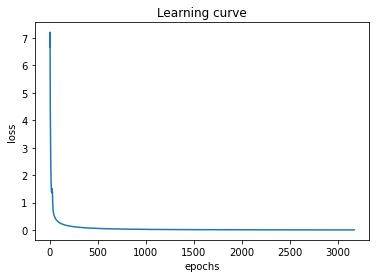

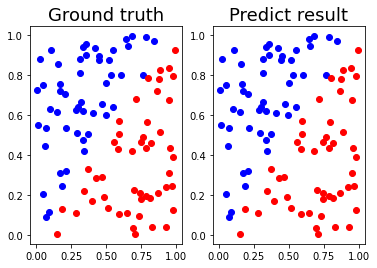

Accuracy : 100.0 %

 Predictions : 
 [[1.00000000e+00]
 [6.12976809e-72]
 [1.36536403e-31]
 [1.00000000e+00]
 [1.35583445e-67]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.89187277e-40]
 [4.93067647e-13]
 [1.00000000e+00]
 [1.42190459e-16]
 [1.25666137e-75]
 [1.00000000e+00]
 [4.35642696e-69]
 [1.00000000e+00]
 [9.89974172e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.61878055e-38]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.70211426e-56]
 [6.51212618e-69]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.31926515e-29]
 [1.00000000e+00]
 [9.99999970e-01]
 [1.14540125e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.89327317e-07]
 [3.01666614e-66]
 [6.56174651e-09]
 [3.62364036e-37]
 [2.03354129e-29]
 [1.00000000e+00]
 [2.29845930e-92]
 [3.90601466e-51]
 [6.61103185e-56]
 [1.00000000e+00]
 [7.86523716e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.40659698e-28]
 [1.00000000e+00]
 [9.99177848e-01]
 [1.00000000e+00]
 [2.57708

In [17]:
print('---------- Learning rate = 1, Hidden units = 4, without activation function ---------')
train_linear(1, 4, 'None')

## XOR

---------- Different learning rate, Hidden units = 4, Activation function = Sigmoid ---------

˙ Learning rate = 0.100
epoch    0 loss : 6.8182
epoch  500 loss : 6.8805
epoch 1000 loss : 6.8756
epoch 1500 loss : 6.8685
epoch 2000 loss : 6.8576
epoch 2500 loss : 6.8401
epoch 3000 loss : 6.8116
epoch 3500 loss : 6.7659
epoch 4000 loss : 6.6982
epoch 4500 loss : 6.6102
epoch 5000 loss : 6.5106
epoch 5500 loss : 6.4094
epoch 6000 loss : 6.3122
epoch 6500 loss : 6.2191
epoch 7000 loss : 6.1260
epoch 7500 loss : 6.0278
epoch 8000 loss : 5.9191
epoch 8500 loss : 5.7967
epoch 9000 loss : 5.6603
epoch 9500 loss : 5.5107
epoch 10000 loss : 5.3497
epoch 10500 loss : 5.1790
epoch 11000 loss : 4.9976
epoch 11500 loss : 4.8001
epoch 12000 loss : 4.5783
epoch 12500 loss : 4.3275
epoch 13000 loss : 4.0516
epoch 13500 loss : 3.7593
epoch 14000 loss : 3.4605
epoch 14500 loss : 3.1653
epoch 15000 loss : 2.8832
epoch 15500 loss : 2.6216
epoch 16000 loss : 2.3846
epoch 16500 loss : 2.1722
epoch 17000 loss 

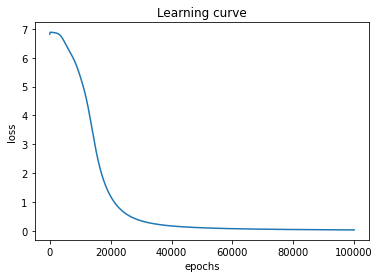

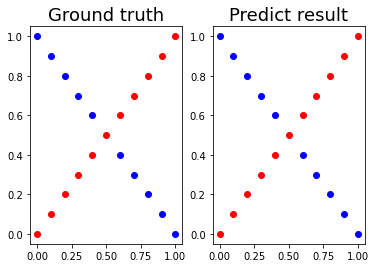

Accuracy : 100.0 %

 Predictions : 
 [[4.96345375e-08]
 [9.99243129e-01]
 [1.92369622e-05]
 [9.99160488e-01]
 [3.33051013e-03]
 [9.99002808e-01]
 [8.18227677e-03]
 [9.98528749e-01]
 [4.80951155e-03]
 [9.82059300e-01]
 [2.24525890e-03]
 [1.23618374e-03]
 [9.93716672e-01]
 [8.21082544e-04]
 [9.99536340e-01]
 [6.21691151e-04]
 [9.99504472e-01]
 [5.11620093e-04]
 [9.99383811e-01]
 [4.44085125e-04]
 [9.99056244e-01]]

˙ Learning rate = 0.010
epoch    0 loss : 6.9722
epoch  500 loss : 6.9173
epoch 1000 loss : 6.9040
epoch 1500 loss : 6.9001
epoch 2000 loss : 6.8984
epoch 2500 loss : 6.8971
epoch 3000 loss : 6.8960
epoch 3500 loss : 6.8949
epoch 4000 loss : 6.8939
epoch 4500 loss : 6.8929
epoch 5000 loss : 6.8920
epoch 5500 loss : 6.8911
epoch 6000 loss : 6.8901
epoch 6500 loss : 6.8892
epoch 7000 loss : 6.8884
epoch 7500 loss : 6.8875
epoch 8000 loss : 6.8866
epoch 8500 loss : 6.8858
epoch 9000 loss : 6.8849
epoch 9500 loss : 6.8841
epoch 10000 loss : 6.8832
epoch 10500 loss : 6.8823
epoch 1

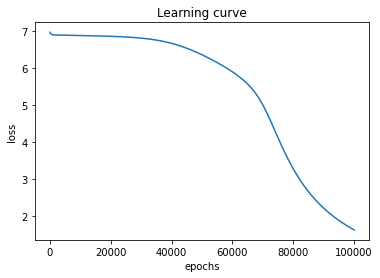

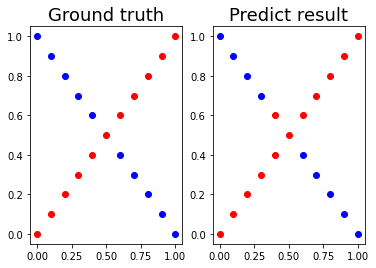

Accuracy : 95.23809523809524 %

 Predictions : 
 [[0.00978139]
 [0.98844226]
 [0.03289467]
 [0.98532982]
 [0.10778511]
 [0.97371997]
 [0.21086204]
 [0.90213966]
 [0.2477213 ]
 [0.49190066]
 [0.21090662]
 [0.14856036]
 [0.51977371]
 [0.09579541]
 [0.92314616]
 [0.06119694]
 [0.97622026]
 [0.04063135]
 [0.98374121]
 [0.02861158]
 [0.985093  ]]

˙ Learning rate = 0.001
epoch    0 loss : 6.9292
epoch  500 loss : 6.9265
epoch 1000 loss : 6.9239
epoch 1500 loss : 6.9215
epoch 2000 loss : 6.9192
epoch 2500 loss : 6.9170
epoch 3000 loss : 6.9149
epoch 3500 loss : 6.9130
epoch 4000 loss : 6.9111
epoch 4500 loss : 6.9094
epoch 5000 loss : 6.9077
epoch 5500 loss : 6.9061
epoch 6000 loss : 6.9047
epoch 6500 loss : 6.9033
epoch 7000 loss : 6.9019
epoch 7500 loss : 6.9007
epoch 8000 loss : 6.8995
epoch 8500 loss : 6.8984
epoch 9000 loss : 6.8973
epoch 9500 loss : 6.8963
epoch 10000 loss : 6.8953
epoch 10500 loss : 6.8944
epoch 11000 loss : 6.8936
epoch 11500 loss : 6.8927
epoch 12000 loss : 6.8920
e

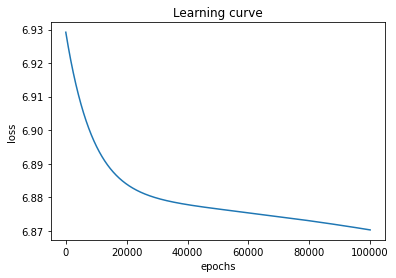

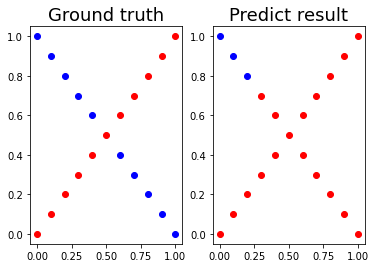

Accuracy : 66.66666666666667 %

 Predictions : 
 [[0.49128152]
 [0.52529838]
 [0.48797567]
 [0.51469322]
 [0.48475517]
 [0.50423111]
 [0.48163247]
 [0.49412966]
 [0.47861384]
 [0.48457399]
 [0.47570022]
 [0.47288864]
 [0.46758866]
 [0.47017379]
 [0.46026662]
 [0.46754943]
 [0.45371802]
 [0.46500938]
 [0.44789619]
 [0.46254828]
 [0.44273643]]


In [18]:
print('---------- Different learning rate, Hidden units = 4, Activation function = Sigmoid ---------')
for lr in [0.1, 0.01, 0.001]:
    print('\n˙ Learning rate = {:.3f}'.format(lr))
    train_XOR(lr, 4, 'Sigmoid')

---------- Learning rate = 1, Different hidden units, Activation function = Sigmoid ---------

˙ Hidden units = 2
epoch    0 loss : 7.0341
epoch  500 loss : 6.7069
epoch 1000 loss : 5.2604
epoch 1500 loss : 4.8246
epoch 2000 loss : 4.6702
epoch 2500 loss : 4.6131
epoch 3000 loss : 4.5860
epoch 3500 loss : 4.5708
epoch 4000 loss : 4.5612
epoch 4500 loss : 4.5547
epoch 5000 loss : 4.5499
epoch 5500 loss : 4.5464
epoch 6000 loss : 4.5436
epoch 6500 loss : 4.5414
epoch 7000 loss : 4.5396
epoch 7500 loss : 4.5382
epoch 8000 loss : 4.5369
epoch 8500 loss : 4.5358
epoch 9000 loss : 4.5349
epoch 9500 loss : 4.5341
epoch 10000 loss : 4.5334
epoch 10500 loss : 4.5328
epoch 11000 loss : 4.5322
epoch 11500 loss : 4.5317
epoch 12000 loss : 4.5313
epoch 12500 loss : 4.5309
epoch 13000 loss : 4.5305
epoch 13500 loss : 4.5302
epoch 14000 loss : 4.5298
epoch 14500 loss : 4.5296
epoch 15000 loss : 4.5293
epoch 15500 loss : 4.5291
epoch 16000 loss : 4.5288
epoch 16500 loss : 4.5286
epoch 17000 loss : 4.5

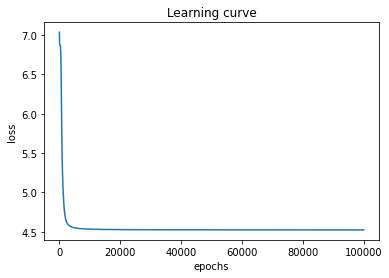

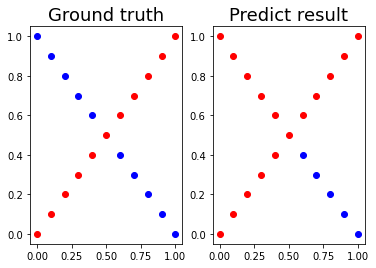

Accuracy : 76.19047619047619 %

 Predictions : 
 [[0.31286923]
 [0.31249501]
 [0.31270747]
 [0.3124944 ]
 [0.31261522]
 [0.31249317]
 [0.3125626 ]
 [0.31249157]
 [0.31253249]
 [0.31249071]
 [0.31251519]
 [0.31250516]
 [0.99971687]
 [0.31249929]
 [0.99997863]
 [0.31249582]
 [0.99997955]
 [0.31249373]
 [0.99997966]
 [0.31249244]
 [0.99997969]]

˙ Hidden units = 8
epoch    0 loss : 6.6406
epoch  500 loss : 2.2160
epoch 1000 loss : 0.4841
epoch 1500 loss : 0.1481
epoch 2000 loss : 0.0714
epoch 2500 loss : 0.0436
epoch 3000 loss : 0.0303
epoch 3500 loss : 0.0228
epoch 4000 loss : 0.0180
epoch 4500 loss : 0.0147
epoch 5000 loss : 0.0124
epoch 5500 loss : 0.0107
epoch 6000 loss : 0.0093
epoch 6500 loss : 0.0083
epoch 7000 loss : 0.0074
epoch 7500 loss : 0.0067
epoch 8000 loss : 0.0061
epoch 8500 loss : 0.0056
epoch 9000 loss : 0.0051


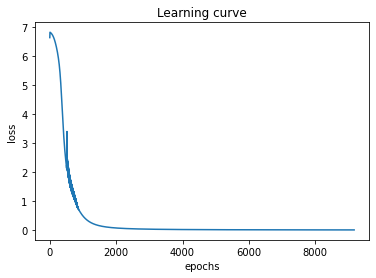

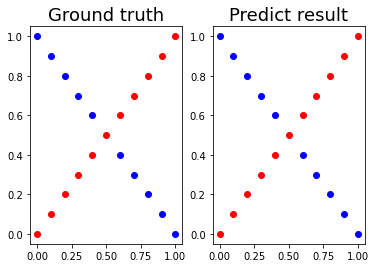

Accuracy : 100.0 %

 Predictions : 
 [[1.89493567e-05]
 [9.99999971e-01]
 [6.66354186e-05]
 [9.99999966e-01]
 [2.34702628e-04]
 [9.99999950e-01]
 [6.55481070e-04]
 [9.99999726e-01]
 [1.06406565e-03]
 [9.97860216e-01]
 [8.70096923e-04]
 [4.27089797e-04]
 [9.98153806e-01]
 [1.66830292e-04]
 [9.99998588e-01]
 [6.39613857e-05]
 [9.99998933e-01]
 [2.67954122e-05]
 [9.99998476e-01]
 [1.27270690e-05]
 [9.99997582e-01]]

˙ Hidden units = 16
epoch    0 loss : 6.6018
epoch  500 loss : 0.7411
epoch 1000 loss : 0.1416
epoch 1500 loss : 0.0683
epoch 2000 loss : 0.0438
epoch 2500 loss : 0.0319
epoch 3000 loss : 0.0249
epoch 3500 loss : 0.0204
epoch 4000 loss : 0.0172
epoch 4500 loss : 0.0149
epoch 5000 loss : 0.0131
epoch 5500 loss : 0.0117
epoch 6000 loss : 0.0105
epoch 6500 loss : 0.0096
epoch 7000 loss : 0.0088
epoch 7500 loss : 0.0081
epoch 8000 loss : 0.0075
epoch 8500 loss : 0.0070
epoch 9000 loss : 0.0066
epoch 9500 loss : 0.0062
epoch 10000 loss : 0.0059
epoch 10500 loss : 0.0056
epoch 11000

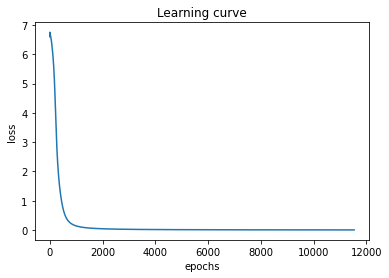

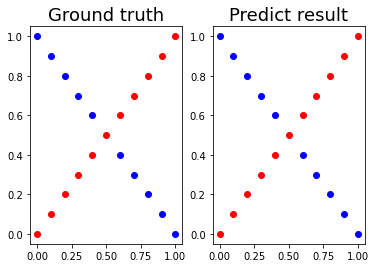

Accuracy : 100.0 %

 Predictions : 
 [[3.22139285e-05]
 [9.99812574e-01]
 [1.00945392e-04]
 [9.99826332e-01]
 [2.62617854e-04]
 [9.99842276e-01]
 [4.85405346e-04]
 [9.99850986e-01]
 [6.33383251e-04]
 [9.98717768e-01]
 [6.30305740e-04]
 [5.27204129e-04]
 [9.98272386e-01]
 [4.02349483e-04]
 [9.99929250e-01]
 [2.96453909e-04]
 [9.99959380e-01]
 [2.18122611e-04]
 [9.99968232e-01]
 [1.63143613e-04]
 [9.99972325e-01]]


In [19]:
print('---------- Learning rate = 1, Different hidden units, Activation function = Sigmoid ---------')
for hu in [2, 8, 16]:
    print('\n˙ Hidden units = {:d}'.format(hu))
    train_XOR(1, hu, 'Sigmoid')

---------- Learning rate = 1, Hidden units = 4, without activation function ---------
epoch    0 loss : 6.9068
epoch  500 loss : 6.8949
epoch 1000 loss : 6.8949
epoch 1500 loss : 6.8949
epoch 2000 loss : 6.8949
epoch 2500 loss : 6.8949
epoch 3000 loss : 6.8949
epoch 3500 loss : 6.8949
epoch 4000 loss : 6.8949
epoch 4500 loss : 6.8949
epoch 5000 loss : 6.8949
epoch 5500 loss : 6.8949
epoch 6000 loss : 6.8949
epoch 6500 loss : 6.8949
epoch 7000 loss : 6.8949
epoch 7500 loss : 6.8949
epoch 8000 loss : 6.8949
epoch 8500 loss : 6.8949
epoch 9000 loss : 6.8949
epoch 9500 loss : 6.8949
epoch 10000 loss : 6.8949
epoch 10500 loss : 6.8949
epoch 11000 loss : 6.8949
epoch 11500 loss : 6.8949
epoch 12000 loss : 6.8949
epoch 12500 loss : 6.8949
epoch 13000 loss : 6.8949
epoch 13500 loss : 6.8949
epoch 14000 loss : 6.8949
epoch 14500 loss : 6.8949
epoch 15000 loss : 6.8949
epoch 15500 loss : 6.8949
epoch 16000 loss : 6.8949
epoch 16500 loss : 6.8949
epoch 17000 loss : 6.8949
epoch 17500 loss : 6.894

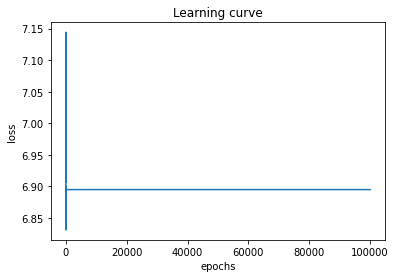

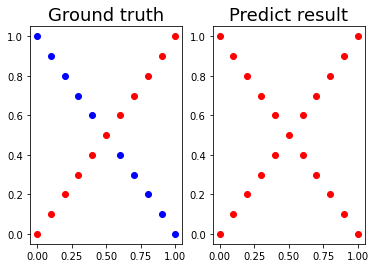

Accuracy : 52.38095238095238 %

 Predictions : 
 [[0.5       ]
 [0.48030486]
 [0.49605901]
 [0.48030486]
 [0.49211852]
 [0.48030486]
 [0.488179  ]
 [0.48030486]
 [0.48424095]
 [0.48030486]
 [0.48030486]
 [0.47637121]
 [0.48030486]
 [0.47244048]
 [0.48030486]
 [0.46851318]
 [0.48030486]
 [0.46458977]
 [0.48030486]
 [0.46067073]
 [0.48030486]]


In [20]:
print('---------- Learning rate = 1, Hidden units = 4, without activation function ---------')
train_XOR(1, 4, 'None')